In [17]:
import numpy as np
from joommf.drivers.evolver import LLG, Minimiser
from joommf.mesh import Mesh
from joommf.sim import Sim
from joommf.energies.demag import Demag
from joommf.energies.zeeman import FixedZeeman
from joommf.energies.exchange import Exchange
import joommf.vectorfield

In [2]:
mesh = Mesh([120e-9, 120e-9, 10e-9], [5e-09, 5e-09, 5e-09])
A = 1.3e-11
gamma = 2.210173e5
dm = 0.01

In [3]:
relax = Sim(mesh, 8.0e5, name='relax', debug=True)
relax.add_energy(Demag())
H_Field = np.array([0.81345856316858023, 0.58162287266553481, 0.0])*8e4
relax.add_energy(FixedZeeman(H_Field))
relax.add_energy(Exchange(A=1.3e-11))
relax.set_evolver(LLG(t=5e-9,
                      m_init = [0, 0, 1],
                      Ms = 8.0e5,
                      alpha = 1.0,
                      gamma = 2.210173e5,
                      dm=0.01,
                      name=relax))
relax.run()

DEBUG: This simulation name already exists.
About to execute: '/Users/ryan/oommf/oommf/oommf.tcl boxsi relax3.mif'
Running simulation... This may take a while
Simulation complete
JOOMMF DEBUG MODE
Oommf Stderr:
b''



Oommf Stdout:
b'Start: "/Users/ryan/oommf-python/joommf/relax3.mif"\nOptions: -threads 2\nBoxsi version 1.2.0.6\nRunning on: ip-036-167.vpn.soton.ac.uk\nOS/machine: Darwin/x86_64\nUser: ryan\tPID: 5639\nNumber of threads: 2\nMesh geometry: 24 x 24 x 2 = 1 152 cells\nBoxsi run end.\n'
Loading simulation scalar output from relax3.odt


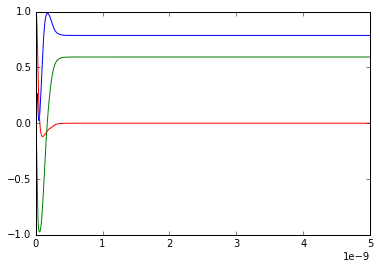

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(relax.df.time, relax.df.mx)
plt.plot(relax.df.time, relax.df.my)
plt.plot(relax.df.time, relax.df.mz)

Here we can see that the magnetization has settled into a steady state. We can get the final output from the final magnetisation file name, and use this as the initial magnetisation for a dynamic simulation.

In [6]:
filename = relax.final_mag

In [10]:
dynamic = Sim(mesh, 8.0e5, name='dynamic', debug=True)
dynamic.add_energy(Demag())
H_Field = np.array([0.81345856316858023, 0.57346234436332832, 0.0])*8e4
dynamic.add_energy(FixedZeeman(H_Field))
dynamic.add_energy(Exchange(A=1.3e-11))
dynamic.set_evolver(LLG(t=5e-12,
                      m_init = filename,
                      Ms = 8.0e5,
                      alpha = 0.008,
                      gamma = 2.210173e5,
                      name=relax))
dynamic.run(stages=4000)

About to execute: '/Users/ryan/oommf/oommf/oommf.tcl boxsi dynamic.mif'
Running simulation... This may take a while
Simulation complete
JOOMMF DEBUG MODE
Oommf Stderr:
b''



Oommf Stdout:
b'Start: "/Users/ryan/oommf-python/joommf/dynamic.mif"\nOptions: -threads 2\nBoxsi version 1.2.0.6\nRunning on: ip-036-167.vpn.soton.ac.uk\nOS/machine: Darwin/x86_64\nUser: ryan\tPID: 5714\nNumber of threads: 2\nMesh geometry: 24 x 24 x 2 = 1 152 cells\nBoxsi run end.\n'
Loading simulation scalar output from dynamic.odt


(0, 8e-09)

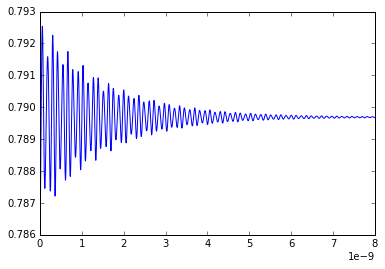

In [15]:
plt.plot(dynamic.df.time, dynamic.df.mx)
plt.xlim([0,.8e-8])

In [16]:
dynamic.final_mag

'dynamic-Oxs_TimeDriver-Magnetization-000003999-0024520.omf'

In [21]:
field = joommf.vectorfield.VectorField(dynamic.final_mag)


ValueError: operands could not be broadcast together with shapes (1152,) (1728,) 

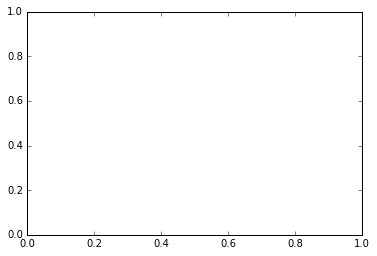

In [27]:
plt.quiver(field.z_slice(0.5)[0], field.z_slice(0.5)[1])